In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 10)

L'ajout est effectué en utilisant la méthode .append() du DataFrame. 

Le processus de l'ajout d'un nouveau DataFrame avec les données du DataFrame d'origine ajoutées en premier, et les lignes de la seconde.

L'ajout d'une annexe n'effectue pas l'alignement et peut avoir pour comme conséquence de dupliquer les valeurs d'index.

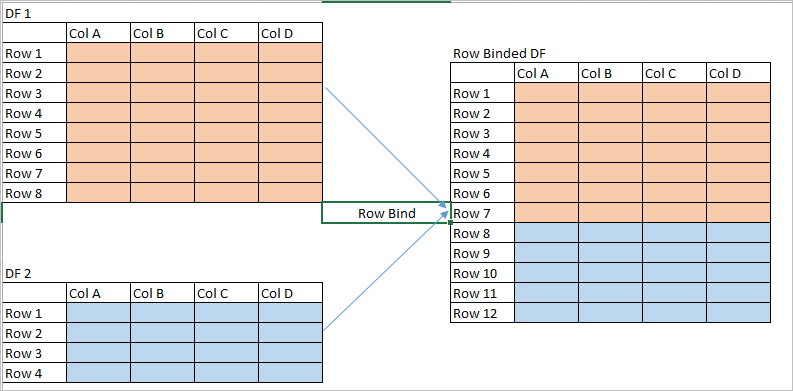

In [2]:
exam_data  = {'nom': ['Anne', 'Alex', 'catherine', 'Jean', 'Emillie', 'Michel', 'Matieu', 'Laura', 'Kevin', 'Jonas'],
        'note': [12.5, 9, 16.5, np.nan, 9, 20, 14.5, np.nan, 8, 19],
        'qualification': ['yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes']}
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
df = pd.DataFrame(exam_data , index=labels)
df

,nom,note,qualification
a,Anne,12.5,yes
b,Alex,9.0,no
c,catherine,16.5,yes
d,Jean,NaN,no
e,Emillie,9.0,no
f,Michel,20.0,yes
g,Matieu,14.5,yes
h,Laura,NaN,no
i,Kevin,8.0,no
j,Jonas,19.0,yes


In [3]:
# On copie les 4° lignes
df1 = df.iloc[0:3].copy()
print(df1)

# copie des lignes 8,9 et 2
df2 = df.iloc[[8, 9, 2]]
print(df2)

# On ajout les lignes
ajout = df1.append(df2)


         nom  note qualification
a       Anne  12.5           yes
b       Alex   9.0            no
c  catherine  16.5           yes
         nom  note qualification
i      Kevin   8.0            no
j      Jonas  19.0           yes
c  catherine  16.5           yes


In [4]:
ajout

,nom,note,qualification
a,Anne,12.5,yes
b,Alex,9.0,no
c,catherine,16.5,yes
i,Kevin,8.0,no
j,Jonas,19.0,yes
c,catherine,16.5,yes


L'ensemble des colonnes des objets DataFrame ajoutés n'a pas besoin d'être le même. 

Le DataFrame résultant consistera en l'union des colonnes dans les deux et si l'une ou l'autre n'avait pas de colonne, NaN sera utilisé comme valeur.

Le code suivant le démontre en créant une troisième DataFrame utilisant le même index que df1, mais ayant une seule colonne avec un nom de colonne unique :


In [5]:
df3 = pd.DataFrame(0.0,index=df1.index,columns=['new'])
df3


,new
a,0.0
b,0.0
c,0.0


In [6]:
df1.append(df3,sort=False)



,nom,note,qualification,new
a,Anne,12.5,yes,NaN
b,Alex,9.0,no,NaN
c,catherine,16.5,yes,NaN
a,NaN,NaN,NaN,0.0
b,NaN,NaN,NaN,0.0
c,NaN,NaN,NaN,0.0


Pour ajouter sans forcer l'index à prendre dans l'un ou l'autre DataFrame, vous pouvez utiliser le paramètre ignore_index=True. 
Ceci est utile lorsque les valeurs d'index n'ont pas de signification significative, et que vous voulez simplement des données concaténées avec des nombres entiers croissants séquentiellement comme index 

In [7]:
df1.append(df3,ignore_index=True, sort=False)

,nom,note,qualification,new
0,Anne,12.5,yes,NaN
1,Alex,9.0,no,NaN
2,catherine,16.5,yes,NaN
3,NaN,NaN,NaN,0.0
4,NaN,NaN,NaN,0.0
5,NaN,NaN,NaN,0.0


In [10]:
df3['nom']=["Jacques","Eric","Albert"]
pd.concat([df1,df3], sort=False)

,nom,note,qualification,new
a,Anne,12.5,yes,NaN
b,Alex,9.0,no,NaN
c,catherine,16.5,yes,NaN
a,Jacques,NaN,NaN,0.0
b,Eric,NaN,NaN,0.0
c,Albert,NaN,NaN,0.0


In [9]:

new_df = pd.DataFrame(columns=['col_a','col_b']).astype({'col_a':'float32', 'col_b':'int8'})



new_df = new_df.append({'col_a':5,'col_b':10}, ignore_index=True)
new_df = new_df.append({'col_a':1,'col_b':100}, ignore_index=True)

new_df

,col_a,col_b
0,5.0,10
1,1.0,100
